In [1]:
import os
os.chdir(os.getcwd().replace('/Code', ''))
print(os.getcwd())

/home/id1019/Documents/PFE/GITHUB


In [2]:
import pandas as pd
from pathlib import Path
import glob
import re
import gzip
import pickle as pkl
import matplotlib.pyplot as plt

## Importation des CV

In [3]:
%%time
CVs = pd.DataFrame(columns=['id_CV', 'text'])
for p in  Path('.').glob('./data/*'):
    if p.is_file():
        with open(p,'r') as f:
            CVs = CVs.append({'id_CV': p.parts[1], 'text': f.read() }, ignore_index=True)
CVs.index = CVs['id_CV']
print(CVs.shape)

(8769, 2)
CPU times: user 18 s, sys: 236 ms, total: 18.2 s
Wall time: 19.3 s


## Suppression des xxx ou XXX 

In [4]:
print(CVs.head(1))
try:
    CVs['text_no_x'] = [re.sub("[x]{2,}|[X]{2,}", ' ', CV) for CV in CVs["text"]]
    CVs = CVs.drop(['text'], axis=1)
except: pass
print(CVs.head(1))

      id_CV                                               text
id_CV                                                         
5711   5711  xxxxx Jaouadi – Junior Data Scientist\n\n\nxxx...
      id_CV                                          text_no_x
id_CV                                                         
5711   5711    Jaouadi – Junior Data Scientist\n\n\n  Jaoua...


## Etude de la longueur des CV

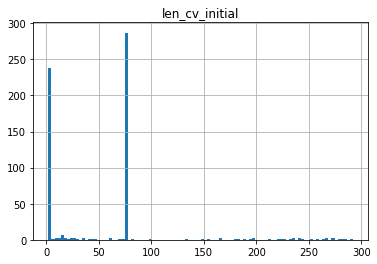

In [6]:
CVs['len_cv_initial'] = [len(re.sub("[\s]", "",CVs.loc[cv, 'text_no_x'].lower())) for cv in CVs.index]
CVs.sort_values(by = "len_cv_initial").loc[CVs["len_cv_initial"]<300].hist(bins=100)
plt.show()

Les deux pics correspondent à "None" et à "Remarque : Ceci est un document Word converti. Une image duCV est affichée au lieu du texte." En dessous de 100, il s'agit de bruit sans doute lié à la transformation PDF vers TEXT.

### On supprime ceux ayant une longueur de moins de 100

In [7]:
print("Suppression de ", len([cv for cv in CVs.index if CVs.loc[cv]["len_cv_initial"] <100]),'cv')
CVs = CVs.drop([cv for cv in CVs.index if CVs.loc[cv]["len_cv_initial"] <100])
print(CVs.shape)

Suppression de  557 cv
(8212, 3)


### Exportation

In [8]:
with gzip.open('Matrices/CVs1_suppressionCV.pkl.gz', 'wb') as f:
    pkl.dump(CVs, f)